In this notebook, I will build a predictive model to predict sale price for housing.  To find the best model, I will compare the performace of various machine learning algorythms, including linear regression, knn and random forest. I will also determine the best set of features to use. 
https://machinelearningmastery.com/train-final-machine-learning-model/

## <b>Importing and Preparing data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the dataset into a dataframe using pandas
df = pd.read_csv('dataset.csv')
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [2]:
# Get a sense of the size of the datasest
df.shape

(1460, 81)

In [3]:
# Summarize columns with missing values

def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis = 0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * mis_val / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis = 1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending = False).round(1)
        print ("There are " + str(mz_table.shape[0]) + " columns that have missing values.")
        return mz_table

missing_zero_values_table(df)

There are 19 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
PoolQC,0,1453,99.5,1453,99.5,object
MiscFeature,0,1406,96.3,1406,96.3,object
Alley,0,1369,93.8,1369,93.8,object
Fence,0,1179,80.8,1179,80.8,object
FireplaceQu,0,690,47.3,690,47.3,object
LotFrontage,0,259,17.7,259,17.7,float64
GarageType,0,81,5.5,81,5.5,object
GarageYrBlt,0,81,5.5,81,5.5,float64
GarageFinish,0,81,5.5,81,5.5,object
GarageQual,0,81,5.5,81,5.5,object


In [4]:
# Drop columns containing more than 60% null values

df.dropna(thresh = df.shape[0]*0.6, how = 'all', inplace = True, axis=1)
df.shape

(1460, 76)

MasVnrArea_median value =  0.0


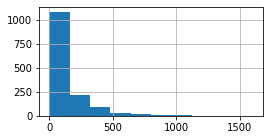

In [5]:
# Check the value distribution in MasVnrArea, which has 861 zero values, nearly 60%.  

plt.figure(figsize=(4,2))
df['MasVnrArea'].hist()
print('MasVnrArea_median value = ', df['MasVnrArea'].median())

In [6]:
# Data in MasVnrArea column are largely zeros and unlikely to be useful.  Thus will be dropped.

df.drop(['MasVnrArea'], axis = 1, inplace = True)
missing_zero_values_table(df)

There are 13 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
LotFrontage,0,259,17.7,259,17.7,float64
GarageType,0,81,5.5,81,5.5,object
GarageYrBlt,0,81,5.5,81,5.5,float64
GarageFinish,0,81,5.5,81,5.5,object
GarageQual,0,81,5.5,81,5.5,object
GarageCond,0,81,5.5,81,5.5,object
BsmtExposure,0,38,2.6,38,2.6,object
BsmtFinType2,0,38,2.6,38,2.6,object
BsmtQual,0,37,2.5,37,2.5,object
BsmtCond,0,37,2.5,37,2.5,object


In [7]:
# Fill null values in LotFrontage column with the average value

df['LotFrontage'].fillna((df['LotFrontage'].mean()), inplace = True)
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Replacing NA values with the average in the LotFrontage column did not change the mean for the column, thus it is a reasonable approach to preserve the column.

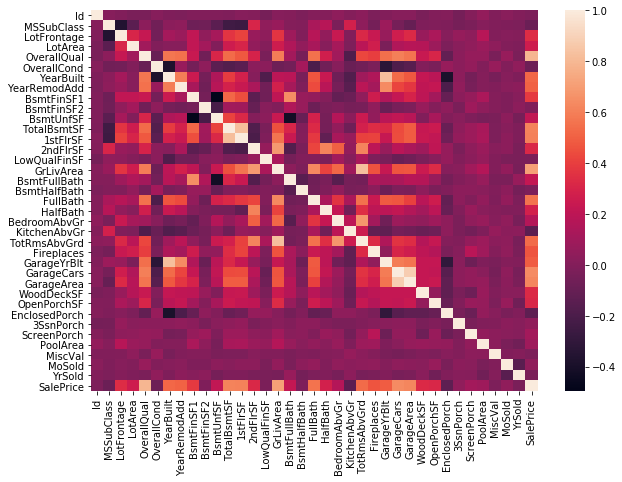

In [8]:
# Check correlations among columns
corr = df.corr()

# Plot heatmap for corr
import seaborn as sns
plt.figure(figsize = (10, 7))
sns.heatmap(corr)

Based on the heatmap, one can see that some fields correlate more with SalePrice than others.  There are also ohter columns that are highly correlated with each other.

In [9]:
# Columns with the highest coorelation with SalePrice

corr.SalePrice.sort_values(ascending=False).head(20)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.334901
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
Name: SalePrice, dtype: float64

In [10]:
# Find highly correlated columns

s = corr.unstack()
so = s.sort_values(ascending = False)
so[so!=1].head(40)

GarageCars    GarageArea      0.882475
GarageArea    GarageCars      0.882475
YearBuilt     GarageYrBlt     0.825667
GarageYrBlt   YearBuilt       0.825667
TotRmsAbvGrd  GrLivArea       0.825489
GrLivArea     TotRmsAbvGrd    0.825489
TotalBsmtSF   1stFlrSF        0.819530
1stFlrSF      TotalBsmtSF     0.819530
OverallQual   SalePrice       0.790982
SalePrice     OverallQual     0.790982
GrLivArea     SalePrice       0.708624
SalePrice     GrLivArea       0.708624
2ndFlrSF      GrLivArea       0.687501
GrLivArea     2ndFlrSF        0.687501
TotRmsAbvGrd  BedroomAbvGr    0.676620
BedroomAbvGr  TotRmsAbvGrd    0.676620
BsmtFullBath  BsmtFinSF1      0.649212
BsmtFinSF1    BsmtFullBath    0.649212
GarageYrBlt   YearRemodAdd    0.642277
YearRemodAdd  GarageYrBlt     0.642277
SalePrice     GarageCars      0.640409
GarageCars    SalePrice       0.640409
FullBath      GrLivArea       0.630012
GrLivArea     FullBath        0.630012
GarageArea    SalePrice       0.623431
SalePrice     GarageArea 

Based on the values and description of the data, the first eight pairs are likely duplicate data. For example,
   GarageCars indicates the "Size of garage in car capacity" while GarageArea indicates the "Size of garage in square   feet", they are just different ways to measure the size of the garage.  
   The same likely holds true for YearBuilt&GarageYrBlt, TotalBsmtSF&1stFlrSF, TotRmsAbvGrd&GrLivArea.  
   Continue down the list, 2ndFlrSF, BedroomAbvGr, BsmtFinSF1 are also likely to have similar information as their pairs.
   Id is also not a useful parameter for predicting sales price and will be dropped as well.

In [11]:
df = df.drop(['Id','GarageCars','GarageYrBlt','TotRmsAbvGrd','TotalBsmtSF'], axis = 1)

In [12]:
# Check for missing values again
missing_zero_values_table(df)

There are 11 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
GarageType,0,81,5.5,81,5.5,object
GarageFinish,0,81,5.5,81,5.5,object
GarageQual,0,81,5.5,81,5.5,object
GarageCond,0,81,5.5,81,5.5,object
BsmtExposure,0,38,2.6,38,2.6,object
BsmtFinType2,0,38,2.6,38,2.6,object
BsmtQual,0,37,2.5,37,2.5,object
BsmtCond,0,37,2.5,37,2.5,object
BsmtFinType1,0,37,2.5,37,2.5,object
MasVnrType,0,8,0.5,8,0.5,object


Among the four columns related to Garage that still have missing values, "GarageType" refers to the Garage 
location, "GarageFinish" refers to the Interior finish of the garage, "GarageQual" refers to Garage quality,
"GarageCond" refers to Garage condition.  I concluded that "GarageCond" should be a sufficient parameter to evalute 
the garage condition.  The other three will be dropped.

In [13]:
df = df.drop(['GarageType', 'GarageFinish', 'GarageQual'], axis = 1)

Among the five columns related to basement that still have missing values, "BsmtExposure" refers to walkout or 
garden level walls, "BsmtFinType2" is the rating of basement finished area (if multiple types), "BsmtQual" 
evaluates the height of the basement, "BsmtCond" evaluates the general condition of the basement, 
"BsmtFinType1" is the rating of basement finished area.  I concluded that "BsmtCond" should be a sufficient 
parameter to evalute the basement condition.

In [14]:
df = df.drop(['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1'], axis = 1)

In [15]:
# Check for missing values again
missing_zero_values_table(df)

There are 4 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
GarageCond,0,81,5.5,81,5.5,object
BsmtCond,0,37,2.5,37,2.5,object
MasVnrType,0,8,0.5,8,0.5,object
Electrical,0,1,0.1,1,0.1,object


Since the total missing values now only comprised of less than 10% of the total data, I decided to preserve the features and drop the rows containing missing values.

In [16]:
df.dropna(inplace = True)

# Check for missing values again
missing_zero_values_table(df)

There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


In [17]:
# Check to make sure that the dates make sense. 

c = df['YearRemodAdd'] >= df['YearBuilt']
c.value_counts()

True    1340
dtype: int64

In [18]:
df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500


#### Transforming object columns to categorical variables

In [19]:
df.dtypes.value_counts()

object     31
int64      31
float64     1
dtype: int64

In [20]:
# List of numeric columns

numerics = ['int64', 'float64']
n_cols = df.select_dtypes(include = numerics).columns
n_cols.sort_values()

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GrLivArea',
       'HalfBath', 'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF',
       'MSSubClass', 'MiscVal', 'MoSold', 'OpenPorchSF', 'OverallCond',
       'OverallQual', 'PoolArea', 'SalePrice', 'ScreenPorch', 'WoodDeckSF',
       'YearBuilt', 'YearRemodAdd', 'YrSold'],
      dtype='object')

In [21]:
len(n_cols)

32

In [22]:
# List of non-numeric columns

o_cols = df.select_dtypes(include=['object']).columns
o_cols.sort_values()

Index(['BldgType', 'BsmtCond', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Foundation', 'Functional', 'GarageCond', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'Neighborhood', 'PavedDrive',
       'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street',
       'Utilities'],
      dtype='object')

In [23]:
len(o_cols)

31

In [24]:
# Change string data type to categorical values and create dummy variable for the text columns

for col in o_cols:
    df[col] = df[col].astype('category')

for col in o_cols:
    col_dummies = pd.get_dummies(df[col]).rename(columns = lambda x: col + str(x))
    df = pd.concat([df, col_dummies], axis=1)
    del df[col]

df.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleTypeConLw,SaleTypeNew,SaleTypeOth,SaleTypeWD,SaleConditionAbnorml,SaleConditionAdjLand,SaleConditionAlloca,SaleConditionFamily,SaleConditionNormal,SaleConditionPartial
0,60,65.0,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0


In [25]:
# Reorder dataframe to have the columns with the highest correlation with sale price listed first

cor_ls = df.corr().SalePrice.sort_values(ascending=False)
new_col = list(cor_ls.index)
df = df[new_col]
df.head(3)

,SalePrice,OverallQual,GrLivArea,GarageArea,1stFlrSF,FullBath,KitchenQualEx,YearBuilt,YearRemodAdd,FoundationPConc,...,NeighborhoodNAmes,RoofStyleGable,SaleTypeWD,LotShapeReg,MSZoningRM,HeatingQCTA,MasVnrTypeNone,FoundationCBlock,KitchenQualTA,ExterQualTA
0,208500,7,1710,548,856,2,0,2003,2003,1,...,0,1,1,1,0,0,0,0,0,0
1,181500,6,1262,460,1262,2,0,1976,1976,0,...,0,1,1,1,0,0,1,1,1,1
2,223500,7,1786,608,920,2,0,2001,2002,1,...,0,1,1,0,0,0,0,0,0,0


In [26]:
df.describe()

,SalePrice,OverallQual,GrLivArea,GarageArea,1stFlrSF,FullBath,KitchenQualEx,YearBuilt,YearRemodAdd,FoundationPConc,...,NeighborhoodNAmes,RoofStyleGable,SaleTypeWD,LotShapeReg,MSZoningRM,HeatingQCTA,MasVnrTypeNone,FoundationCBlock,KitchenQualTA,ExterQualTA
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,...,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,186838.630597,6.221642,1537.831343,501.711940,1176.380597,1.576119,0.072388,1973.073134,1985.694776,0.464179,...,0.155970,0.775373,0.865672,0.618657,0.142537,0.283582,0.569403,0.432836,0.485075,0.599254
std,78899.771325,1.324546,520.237774,186.910163,386.609919,0.547406,0.259226,29.563375,20.292377,0.498901,...,0.362963,0.417492,0.341132,0.485898,0.349731,0.450905,0.495345,0.495653,0.499964,0.490233
min,35311.000000,2.000000,438.000000,160.000000,438.000000,0.000000,0.000000,1880.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,135000.000000,5.000000,1162.000000,378.500000,894.000000,1.000000,0.000000,1956.000000,1968.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,168750.000000,6.000000,1481.500000,484.000000,1098.000000,2.000000,0.000000,1976.000000,1995.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,220000.000000,7.000000,1790.500000,583.750000,1414.500000,2.000000,0.000000,2001.000000,2004.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,755000.000000,10.000000,5642.000000,1418.000000,4692.000000,3.000000,1.000000,2010.000000,2010.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## <b>Split data to training and test data sets

In [27]:
# split data into train and test sets.  X contains feature columns, y contains the target column
from sklearn.model_selection import train_test_split

features = df.columns[1:]
X = df[features]
y = df.SalePrice
X_train, X_test, y_train, y_test = train_test_split(df[features], df.SalePrice, test_size=0.2, random_state=42)

In [28]:
print(df.SalePrice.max())
print(df.SalePrice.min())

755000
35311


## <b>Predicting sales price using linear regression  

### <font color='green'>Use 10-fold cross-validation method to evaluate the model.</font>

In [29]:
# 10-fold was chosen based on convention

from sklearn import linear_model
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold

kf = KFold(10, shuffle = True, random_state = 1)
lr = linear_model.LinearRegression()
y_pred = cross_val_predict(lr, X_train[features], y_train, cv = kf)
mses = cross_val_score(lr, X_train[features], y_train, scoring = 'neg_mean_squared_error', cv = kf)
rmses = np.sqrt(np.abs(mses))
mean_rmse = np.mean(rmses)
rmse_std = np.std(rmses)
print('rmses=', [round(x, 3) for x in rmses])
print('mean rmses = % .3f' %mean_rmse)
print('std of rmse = % .3f' %rmse_std)

rmses= [32220403.542, 25742.956, 856557264.977, 1712617.623, 4280225071.148, 8323092.364, 311240880.993, 129579912.581, 71272978.967, 24788333.916]
mean rmses =  571594629.907
std of rmse =  1261240631.254


Cross validation confirmed that there are large variance in the data set.  Normalization might mitigate this problem.  Another issues is the number of features used.  Because there are over 200 features in the dataset, it might not scale well due to computation cost.  In addition, more features might not be necessary to build a good model.  To determine weather it is reasonable to remove some features, I will use the forward feature selection method where I will start with one feature that has the highest correlation with SalePrice, then adding more feaures one-by-one according to the correlaiton ranking.  The best number of features will be determined as the one that result in the least error.

### <font color='green'>Feature selection using forward selection method</font>

In [30]:
mean_rmse_dict = {}
std_rmse_dict = {}
max_col = len(X_train.columns[0:100]) # my computer locks up when more than 120 features are used here.
for i in range(1, max_col):  
    kf = KFold(10, shuffle = True, random_state = 1)
    lr = linear_model.LinearRegression()
    y_pred = cross_val_predict(lr, X_train.iloc[:, 0:i], y_train, cv = kf)
    mses = cross_val_score(lr, X_train.iloc[:, 0:i], y_train, scoring = 'neg_mean_squared_error', cv = kf)
    rmses = np.sqrt(np.abs(mses))
    avg_rmse = np.mean(rmses)
    std_rmse = np.std(rmses)
    mean_rmse_dict[i] = round(avg_rmse, 3)
    std_rmse_dict[i] = round(std_rmse, 3)
                       
mean_df = pd.DataFrame(mean_rmse_dict.items(), columns = ['n_features', 'rmse'])
std_df = pd.DataFrame(std_rmse_dict.items(), columns = ['n_features', 'std_rmse'])

Text(0.5, 0, 'number of features used')

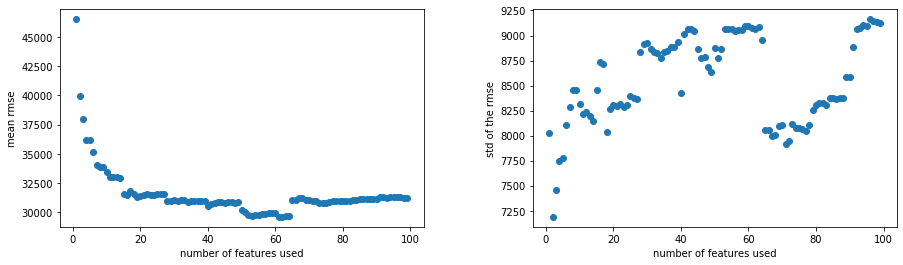

In [31]:
# plot the relationship between the nubmer of features and the error

fig = plt.figure(figsize = (15,4))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(mean_df.n_features, mean_df.rmse)
ax1.set_ylabel('mean rmse')
ax1.set_xlabel('number of features used')

ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(std_df.n_features, std_df.std_rmse)
ax2.set_ylabel('std of the rmse')
ax2.set_xlabel('number of features used')

In [32]:
# find the index and value for the number of features that result in the least error.

min_idx = int(mean_df[['rmse']].idxmin())+1
min_rmse = mean_df.rmse.min()
print('The minimum rmse of', min_rmse, 'was achived using', min_idx, 'features.')

The minimum rmse of 29606.835 was achived using 61 features.


In [33]:
# Train the model using the training set and the best features determined above.

from sklearn.utils import shuffle
import numpy as np
from sklearn.metrics import mean_squared_error 

lr = linear_model.LinearRegression()
lr.fit(X_train.iloc[:,0:min_idx], y_train)
prediction = lr.predict(X_test.iloc[:, 0:(min_idx)])
mse = mean_squared_error(y_test, prediction)
lr_rmse = np.sqrt(mse)
lr_R2_score = lr.score(X_test.iloc[:,0:min_idx], y_test)

intercept = round(lr.intercept_, 3)
coefficients = lr.coef_
print('rmse =', round(lr_rmse, 3))
print('R2_score =', round(lr_R2_score, 3))

rmse = 45376.479
R2_score = 0.731


(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.,
        700000., 800000.]),
 <a list of 9 Text xticklabel objects>)

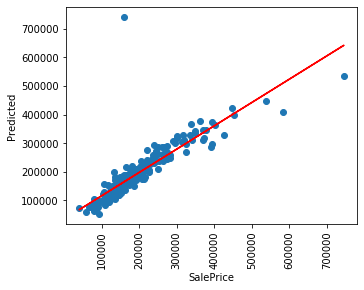

In [34]:
# Visualizing the coorelation between the raw and predicted data

fig = plt.figure(figsize = (12,4))
fig.subplots_adjust(wspace=0.3)

ax1 = fig.add_subplot(1, 2, 2)
ax1.scatter(y_test, prediction)
ax1.set_ylabel('Predicted')
ax1.set_xlabel('SalePrice')
m, b = np.polyfit(y_test, prediction, 1)
abline_values = [m * i + b for i in y_test]
plt.plot(y_test, abline_values, color='red')
plt.xticks(rotation=90)

This model make preptty good prediction for SalePrice where nearly 90% data can be predicted by selected features.  It is also of interest to check out how the model is trained by normalized data.

### <font color='green'>Predictions using normalized data<font>

In [35]:
# Scale numerical columns

norm_df = df.copy()
dfn = norm_df[n_cols]
col_max = dfn.max()
dfn = dfn / col_max
norm_df[n_cols] = dfn
norm_df.head(3)

,SalePrice,OverallQual,GrLivArea,GarageArea,1stFlrSF,FullBath,KitchenQualEx,YearBuilt,YearRemodAdd,FoundationPConc,...,NeighborhoodNAmes,RoofStyleGable,SaleTypeWD,LotShapeReg,MSZoningRM,HeatingQCTA,MasVnrTypeNone,FoundationCBlock,KitchenQualTA,ExterQualTA
0,0.276159,0.7,0.303084,0.386460,0.182438,0.666667,0,0.996517,0.996517,1,...,0,1,1,1,0,0,0,0,0,0
1,0.240397,0.6,0.223680,0.324401,0.268968,0.666667,0,0.983085,0.983085,0,...,0,1,1,1,0,0,1,1,1,1
2,0.296026,0.7,0.316554,0.428773,0.196078,0.666667,0,0.995522,0.996020,1,...,0,1,1,0,0,0,0,0,0,0


In [36]:
# split normalized data to train test sets

X_n = norm_df[features]
y_n = norm_df.SalePrice
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size=0.2, random_state=42)

In [37]:
# Evaluate the model using 10-fold splits and 100 features.

from sklearn import linear_model
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold

features = X_train_n.columns[0:100]  
kf = KFold(10, shuffle = True, random_state = 1)
lr = linear_model.LinearRegression()
y_pred = cross_val_predict(lr, X_train_n[features], y_train_n, cv = kf)
mses = cross_val_score(lr, X_train_n[features], y_train_n, scoring = 'neg_mean_squared_error', cv = kf)
rmses = np.sqrt(np.abs(mses))
mean_rmse = np.mean(rmses)
rmse_std = np.std(rmses)
print('rmses=', [round(x, 3) for x in rmses])
print('mean rmses = % .3f' %mean_rmse)
print('std of rmse = % .3f' %rmse_std)

rmses= [0.027, 0.034, 0.051, 0.038, 77978548135.494, 0.031, 0.036, 0.059, 0.067, 0.04]
mean rmses =  7797854813.588
std of rmse =  23393564440.635


In [38]:
# feature selection using forward selection method.  

mean_rmse_dict = {}
std_rmse_dict = {}
for i in range(1, len(features)):
    kf = KFold(10, shuffle = True, random_state = 1)
    lr = linear_model.LinearRegression()
    y_pred = cross_val_predict(lr, X_train_n.iloc[:, 0:i], y_train_n, cv = kf)
    mses = cross_val_score(lr, X_train_n.iloc[:, 0:i], y_train_n, scoring = 'neg_mean_squared_error', cv = kf)
    rmses = np.sqrt(np.abs(mses))
    avg_rmse = np.mean(rmses)
    std_rmse = np.std(rmses)
    mean_rmse_dict[i] = round(avg_rmse, 3)
    std_rmse_dict[i] = round(std_rmse, 3)
                       
mean_norm_df = pd.DataFrame(mean_rmse_dict.items(), columns = ['n_features', 'rmse'])
std_norm_df = pd.DataFrame(std_rmse_dict.items(), columns = ['n_features', 'std_rmse'])

Text(0.5, 0, 'number of features used')

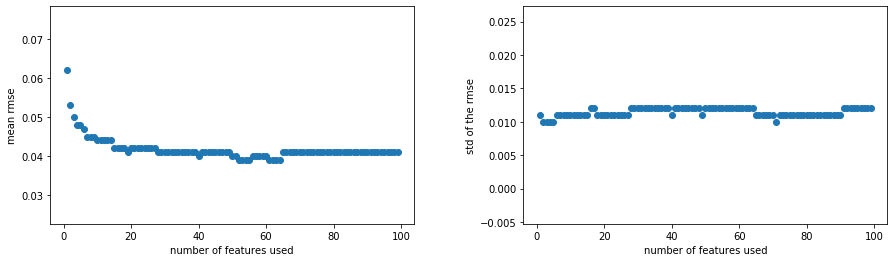

In [39]:
fig = plt.figure(figsize = (15,4))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(mean_norm_df.n_features, mean_norm_df.rmse)
ax1.set_ylabel('mean rmse')
ax1.set_xlabel('number of features used')

ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(std_norm_df.n_features, std_norm_df.std_rmse)
ax2.set_ylabel('std of the rmse')
ax2.set_xlabel('number of features used')

In [40]:
# find the index and value for the number of features that related to the smallest error.

min_idx_n = int(mean_norm_df[['rmse']].idxmin())+1
min_rmse_n = mean_norm_df.rmse.min()
print('The minimum rmse of', min_rmse_n, 'was achived using', min_idx_n, 'features.')

The minimum rmse of 0.039 was achived using 52 features.


In [41]:
# Train the model using the training set and the best features determined above.

lr = linear_model.LinearRegression()
lr.fit(X_train_n.iloc[:,0:min_idx_n], y_train_n)
prediction = lr.predict(X_test_n.iloc[:, 0:(min_idx_n)])
mse = mean_squared_error(y_test_n, prediction)
lrn_rmse = np.sqrt(mse)
lrn_R2_score = lr.score(X_test_n.iloc[:, 0:(min_idx_n)], y_test_n)

intercept = round(lr.intercept_, 3)
coefficients = lr.coef_
print('rmse =', round(lrn_rmse, 3))
print('R2_score =', round(lrn_R2_score, 3))

rmse = 0.06
R2_score = 0.728


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text xticklabel objects>)

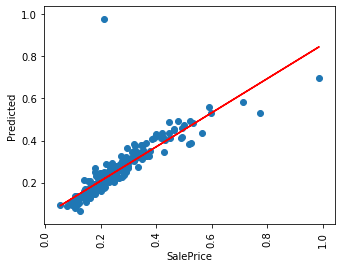

In [42]:
# Visualizing the coorelation between the raw and predicted data

fig = plt.figure(figsize = (12,4))
fig.subplots_adjust(wspace=0.3)

ax1 = fig.add_subplot(1, 2, 2)
ax1.scatter(y_test_n, prediction)
ax1.set_ylabel('Predicted')
ax1.set_xlabel('SalePrice')
m, b = np.polyfit(y_test_n, prediction, 1)
abline_values = [m * i + b for i in y_test_n]
plt.plot(y_test_n, abline_values, color='red')
plt.xticks(rotation=90)

Cross validation and feature selection using the original data and the normalized data resulted in different number of features that produced the smallest rmses.  Much less features are needed to achieve nearly as good as as using more features when the raw data were used.  The R squared scores are similar, both near 90%.  But using normalized data for training might be better for scaling since less features are needed.

## <b>Predicting sales price using knn

### <font color='green'>Use 10-fold cross-validation method to evaluate the model.</font>

In [43]:
# start with three neighbors

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold 

kf = KFold(10, shuffle = True, random_state = 1)
knn = KNeighborsRegressor(n_neighbors = 3)
y_pred = cross_val_predict(knn, X_train[features], y_train, cv = kf)
mses = cross_val_score(knn, X_train[features], y_train, scoring = 'neg_mean_squared_error', cv = kf)
rmses = np.sqrt(np.abs(mses))
mean_rmse = np.mean(rmses)
rmse_std = np.std(rmses)
print('rmses=', [round(x, 3) for x in rmses])
print('mean rmses = % .3f' %mean_rmse)
print('std of rmse = % .3f' %rmse_std)

rmses= [37898.585, 36977.586, 72666.129, 43285.313, 51392.307, 47448.289, 43158.33, 37398.818, 47691.6, 45325.317]
mean rmses =  46324.227
std of rmse =  9904.465


The rmse estiamted is higher than what was estimated by the linear regression model.  I will perform both feature selection and hyperparameter tuning to see whether the model can be improved.

In [44]:
# feature selection using forward selection method with 10 fold cv and 3 neighbors.  

score_dict = {}
mean_rmse_dict = {}
std_rmse_dict = {}
for i in range(2, len(features[0:100])):  # my computer locks up when more than 100 features are used here.
    kf = KFold(10, shuffle = True, random_state = 1)
    knn = KNeighborsRegressor(n_neighbors = 3)
    
    scores = cross_val_score(knn, X_train[features].iloc[:, 0:i], y_train, cv=kf)
    mean_score = np.mean(scores)
    score_dict[i] = mean_score
    mses = cross_val_score(knn, X_train.iloc[:, 0:i], y_train, scoring = 'neg_mean_squared_error', cv = kf)
    rmses = np.sqrt(np.abs(mses))
    avg_rmse = np.mean(rmses)
    std_rmse = np.std(rmses)
    mean_rmse_dict[i] = round(avg_rmse, 3)
    std_rmse_dict[i] = round(std_rmse, 3)
    std_rmse_dict[i] = rmse_std

score_df = pd.DataFrame(score_dict.items(), columns = ['n_features', 'score'])
mean_df = pd.DataFrame(mean_rmse_dict.items(), columns = ['n_features', 'rmse'])
std_df = pd.DataFrame(std_rmse_dict.items(), columns = ['n_features', 'std_rmse'])

Text(0.5, 0, 'number of features used')

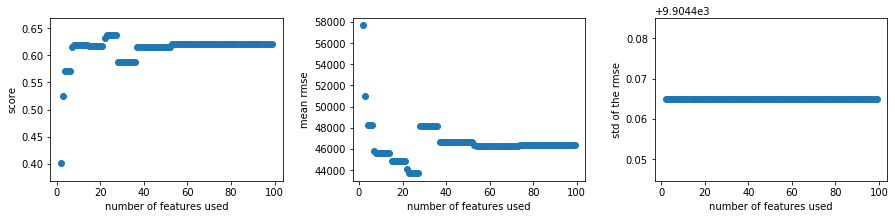

In [45]:
fig = plt.figure(figsize = (15,3))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(score_df.n_features, score_df.score)
ax1.set_ylabel('score')
ax1.set_xlabel('number of features used')

ax2 = fig.add_subplot(1, 3, 2)
ax2.scatter(mean_df.n_features, mean_df.rmse)
ax2.set_ylabel('mean rmse')
ax2.set_xlabel('number of features used')

ax3 = fig.add_subplot(1, 3, 3)
ax3.scatter(std_df.n_features, std_df.std_rmse)
ax3.set_ylabel('std of the rmse')
ax3.set_xlabel('number of features used')

In [46]:
# find the index and value for the number of features that result in the least error.

max_idx = int(score_df[['score']].idxmax())+1
max_score = round(score_df.score.max(), 3)
print('The maximum score of', max_score, 'was achieved using', max_idx, 'features.')

min_idx = int(mean_df[['rmse']].idxmin())+1
min_rmse = round(mean_df.rmse.min(), 3)
print('The minimum rmse of', min_rmse, 'was achieved using', min_idx, 'features.')

The maximum score of 0.637 was achieved using 22 features.
The minimum rmse of 43683.195 was achieved using 22 features.


In [125]:
# Using grid search to find best model parameter k using the best number of fearures estimated above and 10 fold cross-validation.

from sklearn.model_selection import GridSearchCV

knn = KNeighborsRegressor()
param_grid = {'n_neighbors': np.arange(1, 25)} 
knn_gscv = GridSearchCV(knn, param_grid, scoring = 'neg_mean_squared_error', cv=10) 
knn_gscv.fit(X_train.iloc[:, 1:min_idx], y_train)
mse = knn_gscv.best_score_
knn_rmse_tr = np.sqrt(np.abs(mse))
knn_best_param = knn_gscv.best_params_
print(knn_best_param)
print(round(knn_rmse_tr, 3))

{'n_neighbors': 19}
42096.559


In [123]:
# Evaluating the model using test dataset with the best number of neighbors and the best number of features.
from sklearn.metrics import mean_squared_error 

prediction = knn_gscv.predict(X_test.iloc[:, 1:min_idx])
mse = mean_squared_error(y_test, prediction)
knn_rmse = np.sqrt(mse)

print('rmse=', round(knn_rmse, 3))

rmse= 53073.712


(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.,
        700000., 800000.]),
 <a list of 9 Text xticklabel objects>)

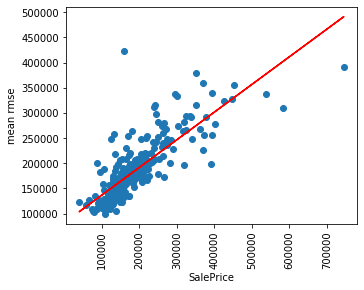

In [124]:
# Visualizing the coorelation between the raw and predicted data

fig = plt.figure(figsize = (12,4))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(y_test, prediction)
ax1.set_ylabel('mean rmse')
ax1.set_xlabel('SalePrice')
m, b = np.polyfit(y_test, prediction, 1)
abline_values = [m * i + b for i in y_test]
plt.plot(y_test, abline_values, color='red')
plt.xticks(rotation=90)

In [128]:
# Including weight in grid search.

weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors = np.arange(1, 25), weights = weight_options)
knn = KNeighborsRegressor()
param_grid = {'n_neighbors': np.arange(1, 25)} 
knn_gscv = GridSearchCV(knn, param_grid, scoring = 'neg_mean_squared_error', cv=10) 
knn_gscv.fit(X_train.iloc[:, 1:min_idx], y_train)
mse = knn_gscv.best_score_
knn_rmse_tr = np.sqrt(np.abs(mse))
knn_best_param = knn_gscv.best_params_
print(knn_best_param)
print(round(knn_rmse_tr, 3))

{'n_neighbors': 19}
42096.559


Using the weight option didn't improved the model.  The rmse valus is the same as before.  The Grid search took a long time for this model.  Below, I will attempt to use Randomized search for comparison.

In [129]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = dict(n_neighbors = np.arange(1, 25), weights = weight_options)
knn_rand = RandomizedSearchCV(knn, param_dist, n_iter=10, scoring = 'neg_mean_squared_error', random_state = 42, cv=10)
knn_rand.fit(X_train.iloc[:, 1:min_idx], y_train)
mse = knn_gscv.best_score_
knn_rmse_tr = np.sqrt(np.abs(mse))
knn_best_param = knn_gscv.best_params_
print(knn_best_param)
print(round(knn_rmse_tr, 3))

{'n_neighbors': 19}
42096.559


Randomized search identified the same value for the optimum numbe of neighrbors as that identified using Grid search.  But it ran much quicker. 

## <b>Predicting sales price using random forest

In [52]:
# evaluate the model using 10 fold cross validation

from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold 

rf = KFold(10, shuffle = True, random_state = 1)
rf = RandomForestClassifier(max_depth=10, random_state=42)
y_pred = cross_val_predict(rf, X_train[features], y_train, cv = kf)
mses = cross_val_score(rf, X_train[features], y_train, scoring = 'neg_mean_squared_error', cv = kf)
rmses = np.sqrt(np.abs(mses))
mean_rmse = np.mean(rmses)
rmse_std = np.std(rmses)
print('rmses=', [round(x, 3) for x in rmses])
print('mean rmses = % .3f' %mean_rmse)
print('std of rmse = % .3f' %rmse_std)

rmses= [34137.684, 44299.961, 74800.956, 53788.309, 48764.633, 41188.773, 35973.422, 40225.149, 57136.47, 48969.045]
mean rmses =  47928.440
std of rmse =  11375.751


In [53]:
# feature selection using forward selection method.  

score_dict = {}
mean_rmse_dict = {}
std_rmse_dict = {}
for i in range(2, len(features[1:100])): 
    kf = KFold(10, shuffle = True, random_state = 1)
    rf = RandomForestClassifier(max_depth=2, random_state=42)
    scores = cross_val_score(rf, X_train[features].iloc[:, 0:i], y_train, cv=kf)
    mean_score = np.mean(scores)
    score_dict[i] = mean_score
    mses = cross_val_score(rf, X_train.iloc[:, 0:i], y_train, scoring = 'neg_mean_squared_error', cv = kf)
    rmses = np.sqrt(np.abs(mses))
    avg_rmse = np.mean(rmses)
    std_rmse = np.std(rmses)
    mean_rmse_dict[i] = round(avg_rmse, 3)
    std_rmse_dict[i] = round(std_rmse, 3)
    std_rmse_dict[i] = rmse_std

score_df = pd.DataFrame(score_dict.items(), columns = ['n_features', 'score'])
mean_df = pd.DataFrame(mean_rmse_dict.items(), columns = ['n_features', 'rmse'])
std_df = pd.DataFrame(std_rmse_dict.items(), columns = ['n_features', 'std_rmse'])

Text(0.5, 0, 'number of features used')

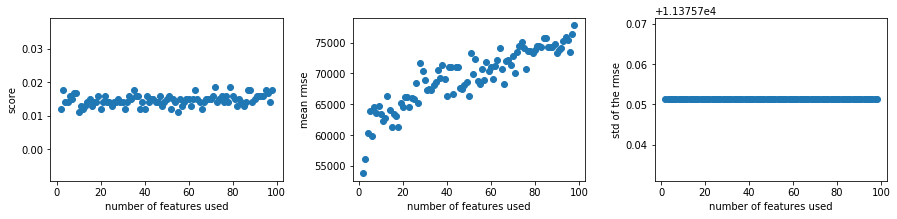

In [54]:
fig = plt.figure(figsize = (15,3))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(score_df.n_features, score_df.score)
ax1.set_ylabel('score')
ax1.set_xlabel('number of features used')

ax2 = fig.add_subplot(1, 3, 2)
ax2.scatter(mean_df.n_features, mean_df.rmse)
ax2.set_ylabel('mean rmse')
ax2.set_xlabel('number of features used')

ax3 = fig.add_subplot(1, 3, 3)
ax3.scatter(std_df.n_features, std_df.std_rmse)
ax3.set_ylabel('std of the rmse')
ax3.set_xlabel('number of features used')

In [55]:
# find the index and value for the number of features that result in the least error.

max_idx = int(score_df[['score']].idxmax())+1
max_score = round(score_df.score.max(), 3)
print('The maximum score of', max_score, 'was achieved using', max_idx, 'features.')

min_idx = int(mean_df[['rmse']].idxmin())+1
min_rmse = round(mean_df.rmse.min(), 3)
print('The minimum rmse of', min_rmse, 'was achieved using', min_idx, 'features.')

The maximum score of 0.019 was achieved using 71 features.
The minimum rmse of 53772.848 was achieved using 1 features.


In [133]:
# hyperparameter search using the best features

rf = RandomForestClassifier() 
param_grid = {'n_estimators': [5, 10, 15, 20], 'max_depth': [2, 5, 7, 9]}

grid_rf = GridSearchCV(rf, param_grid, scoring = 'neg_mean_squared_error', cv=10)
grid_rf.fit(X_train.iloc[:, 0:min_idx], y_train)
rf_bp = grid_rf.best_params_
mse = grid_rf.best_score_
rf_rmse_tr = np.sqrt(np.abs(mse))
print(rf_bp)
print(round(rf_rmse_tr,3))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


{'max_depth': 9, 'n_estimators': 5}
48192.735


In [134]:
# Evaluating the model using test dataset with 13 neighbors and the best features.

prediction = grid_rf.predict(X_test.iloc[:, 0:min_idx])
mse = mean_squared_error(y_test, prediction)
rf_rmse = np.sqrt(mse)
print('rmse=', round(rf_rmse, 3))

rmse= 58009.22


(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.,
        700000., 800000.]),
 <a list of 9 Text xticklabel objects>)

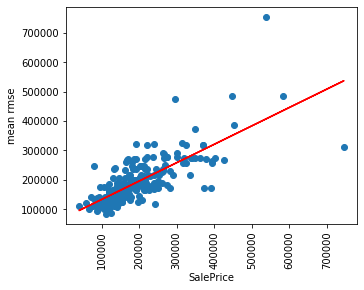

In [135]:
# Visualizing the coorelation between the raw and predicted data

fig = plt.figure(figsize = (12,4))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(y_test, prediction)
ax1.set_ylabel('mean rmse')
ax1.set_xlabel('SalePrice')
m, b = np.polyfit(y_test, prediction, 1)
abline_values = [m * i + b for i in y_test]
plt.plot(y_test, abline_values, color='red')
plt.xticks(rotation=90)

The predictions made by Random Forest algorythm is not as good as the linear regression and knn.  

## <b>Prediction using decision tree

### <font color='green'>Use 10-fold cross-validation method to evaluate the model.</font>

In [59]:
# start with three neighbors

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold 

kf = KFold(10, shuffle = True, random_state = 1)
dt = DecisionTreeRegressor(random_state=42)
y_pred = cross_val_predict(dt, X_train[features], y_train, cv = kf)
mses = cross_val_score(dt, X_train[features], y_train, scoring = 'neg_mean_squared_error', cv = kf)
rmses = np.sqrt(np.abs(mses))
mean_rmse = np.mean(rmses)
rmse_std = np.std(rmses)
print('rmses=', [round(x, 3) for x in rmses])
print('mean rmses = % .3f' %mean_rmse)
print('std of rmse = % .3f' %rmse_std)

rmses= [33834.599, 35672.501, 45797.62, 36249.165, 40382.525, 42046.917, 42734.987, 33339.464, 56161.216, 38340.38]
mean rmses =  40455.937
std of rmse =  6499.693


The rmse estiamted is higher than what was estimated by the linear regression model.  I will perform both feature selection and hyperparameter tuning to see whether the model can be improved.

In [60]:
# feature selection using forward selection method with 10 fold cv and 3 neighbors.  

score_dict = {}
mean_rmse_dict = {}
std_rmse_dict = {}
for i in range(2, len(features[0:100])):  # my computer locks up when more than 100 features are used here.
    kf = KFold(10, shuffle = True, random_state = 1)
    dt = DecisionTreeRegressor(random_state=42)    
    scores = cross_val_score(dt, X_train[features].iloc[:, 0:i], y_train, cv=kf)
    mean_score = np.mean(scores)
    score_dict[i] = mean_score
    mses = cross_val_score(dt, X_train.iloc[:, 0:i], y_train, scoring = 'neg_mean_squared_error', cv = kf)
    rmses = np.sqrt(np.abs(mses))
    avg_rmse = np.mean(rmses)
    std_rmse = np.std(rmses)
    mean_rmse_dict[i] = round(avg_rmse, 3)
    std_rmse_dict[i] = round(std_rmse, 3)
    std_rmse_dict[i] = rmse_std

score_df = pd.DataFrame(score_dict.items(), columns = ['n_features', 'score'])
mean_df = pd.DataFrame(mean_rmse_dict.items(), columns = ['n_features', 'rmse'])
std_df = pd.DataFrame(std_rmse_dict.items(), columns = ['n_features', 'std_rmse'])

Text(0.5, 0, 'number of features used')

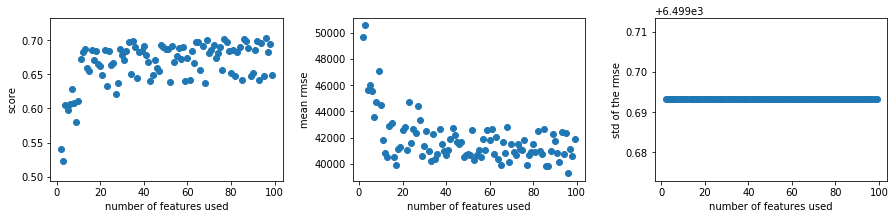

In [61]:
fig = plt.figure(figsize = (15,3))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(score_df.n_features, score_df.score)
ax1.set_ylabel('score')
ax1.set_xlabel('number of features used')

ax2 = fig.add_subplot(1, 3, 2)
ax2.scatter(mean_df.n_features, mean_df.rmse)
ax2.set_ylabel('mean rmse')
ax2.set_xlabel('number of features used')

ax3 = fig.add_subplot(1, 3, 3)
ax3.scatter(std_df.n_features, std_df.std_rmse)
ax3.set_ylabel('std of the rmse')
ax3.set_xlabel('number of features used')

Due to the noise in the score and rmse values, based on their trends, it is reasonalbe to limit features within 20 to reduce the complexity of the model.

In [62]:
# feature selection using forward selection using max of 20 features.  

score_dict = {}
mean_rmse_dict = {}
std_rmse_dict = {}
for i in range(2, len(features[0:20])):  # my computer locks up when more than 100 features are used here.
    kf = KFold(10, shuffle = True, random_state = 1)
    dt = DecisionTreeRegressor(random_state=42)    
    scores = cross_val_score(dt, X_train[features].iloc[:, 0:i], y_train, cv=kf)
    mean_score = np.mean(scores)
    score_dict[i] = mean_score
    mses = cross_val_score(dt, X_train.iloc[:, 0:i], y_train, scoring = 'neg_mean_squared_error', cv = kf)
    rmses = np.sqrt(np.abs(mses))
    avg_rmse = np.mean(rmses)
    std_rmse = np.std(rmses)
    mean_rmse_dict[i] = round(avg_rmse, 3)
    std_rmse_dict[i] = round(std_rmse, 3)
    std_rmse_dict[i] = rmse_std

score_df = pd.DataFrame(score_dict.items(), columns = ['n_features', 'score'])
mean_df = pd.DataFrame(mean_rmse_dict.items(), columns = ['n_features', 'rmse'])
std_df = pd.DataFrame(std_rmse_dict.items(), columns = ['n_features', 'std_rmse'])

Text(0.5, 0, 'number of features used')

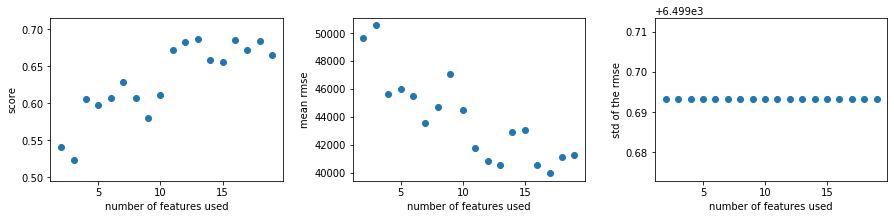

In [63]:
fig = plt.figure(figsize = (15,3))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(score_df.n_features, score_df.score)
ax1.set_ylabel('score')
ax1.set_xlabel('number of features used')

ax2 = fig.add_subplot(1, 3, 2)
ax2.scatter(mean_df.n_features, mean_df.rmse)
ax2.set_ylabel('mean rmse')
ax2.set_xlabel('number of features used')

ax3 = fig.add_subplot(1, 3, 3)
ax3.scatter(std_df.n_features, std_df.std_rmse)
ax3.set_ylabel('std of the rmse')
ax3.set_xlabel('number of features used')

In [64]:
# find the index and value for the number of features that result in the least error.

max_idx = int(score_df[['score']].idxmax())+1
max_score = round(score_df.score.max(), 3)
print('The maximum score of', max_score, 'was achieved using', max_idx, 'features.')

min_idx = int(mean_df[['rmse']].idxmin())+1
min_rmse = round(mean_df.rmse.min(), 3)
print('The minimum rmse of', min_rmse, 'was achieved using', min_idx, 'features.')

The maximum score of 0.687 was achieved using 12 features.
The minimum rmse of 39945.153 was achieved using 16 features.


In [139]:
# hyperparameter search using the best features.  
from sklearn import tree
from sklearn.model_selection import GridSearchCV

dt = tree.DecisionTreeClassifier()
parameters = {'max_depth':range(2,20), 'min_samples_leaf':range(1,20)}
grid_dt = GridSearchCV(dt, parameters, scoring = 'neg_mean_squared_error', n_jobs=4)
grid_dt.fit(X_train.iloc[:, 0:min_idx], y_train)
tree_model = grid_dt.best_estimator_
mse = grid_dt.best_score_
dt_rmse = np.sqrt(abs(mse))
dt_bp = grid_dt.best_params_
print ('rmse = ', round(dt_rmse,3))
print ('best parameters = ', dt_bp) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


rmse =  47303.606
best parameters =  {'max_depth': 15, 'min_samples_leaf': 1}


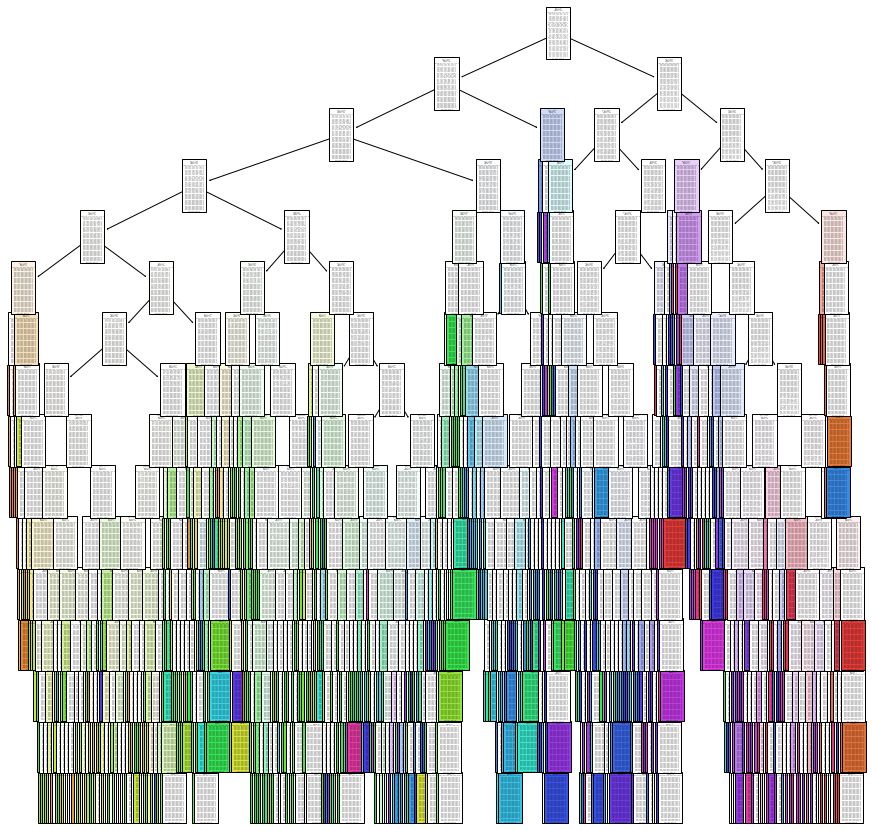

In [141]:
plt.figure(figsize=(15,15))
tree.plot_tree(tree_model, filled=True)

In [142]:
# Evaluating the model using test dataset with the best parameters and the best features.

prediction = grid_dt.predict(X_test.iloc[:, 0:min_idx])
mse = mean_squared_error(y_test, prediction)
dt_rmse = np.sqrt(mse)
print('rmse=', round(dt_rmse, 3))

rmse= 69288.327


(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.,
        700000., 800000.]),
 <a list of 9 Text xticklabel objects>)

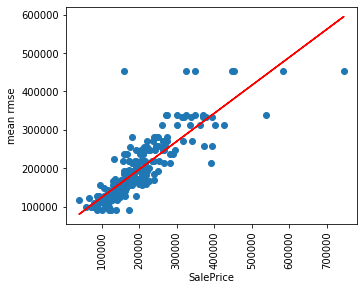

In [69]:
# Visualizing the coorelation between the raw and predicted data

fig = plt.figure(figsize = (12,4))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(y_test, prediction)
ax1.set_ylabel('mean rmse')
ax1.set_xlabel('SalePrice')
m, b = np.polyfit(y_test, prediction, 1)
abline_values = [m * i + b for i in y_test]
plt.plot(y_test, abline_values, color='red')
plt.xticks(rotation=90)

In [151]:
# Summary error from al lmodels

print(f'rmse from linear regression = {round(lr_rmse, 3)}')
print(f'rmse from linear regression using normalized data = {round(lrn_rmse, 3)}')
print(f'R2 score from linear regression = {round(lr_R2_score, 3)}')
print(f'R2 score from linear regression using normalized data = {round(lrn_R2_score, 3)}', '\n')

print(f'rmse from knn = {round(knn_rmse,3)}')
print(f'rmse from random forest = {round(rf_rmse)}')
print(f'rmse from decision tree = {round(dt_rmse)}', '\n')

rmse from linear regression = 45376.479
rmse from linear regression using normalized data = 0.06
R2 score from linear regression = 0.731
R2 score from linear regression using normalized data = 0.728 

rmse from knn = 53073.712
rmse from random forest = 58009.0
rmse from decision tree = 69288.0 



### Conclusion

1. The analysis above indicates that linear regression is the best model for predicting Sale Prices for housing  It has the smallest rmse.
2. Using normalized data, the trained linear model used less number of features but reached a similar accuracy to the model trained with the raw data, thus it is a better choice.  It is also better in terms of scalability since it uses less features.